<a href="https://colab.research.google.com/github/oky15net/Face-Detector/blob/main/Face_Detector_V0_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<font color="#ffffff"><font size="6"><u><b>Ai Pendeteksi Wajah</b></u>


`Terakhir diperbarui : 28 Mei 2023 | 01:00 AM WIB INDONESIA`
### `Okto Ramadhan`
---
Thanks to Chatgpt, berkat jasa nya saya cuma tinggal nyalin code 

[Github][link-to-github] | [Apa Yang Baru?][README] | [Panduan][MANUAL]

<!-- [visitor-badge]: https://visitor-badge.glitch.me/badge?page_id=linaqruf.cag-webui -->
[link-to-github]: https://github.com/oky15net/Face-Detector-OpenCv
[README]: https://i.ytimg.com/vi/XXhdL6jXhp4/maxresdefault.jpg
[MANUAL]: https://i.ytimg.com/vi/XXhdL6jXhp4/maxresdefault.jpg


#**FACE DETECTOR WITH OPEN CV** 



<a href="https://wa.me/6289526075473"><img alt="Whatsapp" src="https://img.shields.io/badge/WhatsApp-25D366?style=for-the-badge&logo=whatsapp&logoColor=white"/></a> <a href="https://www.youtube.com/@dewiperssik.official"><img alt="YOUTUBE" src="https://img.shields.io/badge/YouTube-FF0000?style=for-the-badge&logo=youtube&logoColor=white"/></a>
<a href="https://www.instagram.com/dewiperssik9/"><img alt="INSTAGRAM" src="https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white"/></a>
<a href="![Visitors](https://api.visitorbadge.io/api/visitors?path=https%3A%2F%2Fgithub.com%2Foky15net%2FFace-Detector-OpenCv&label=Okto%20Cicit%20SunanKaliJaga&countColor=%23263759)"><img src="https://api.visitorbadge.io/api/visitors?path=https%3A%2F%2Fgithub.com%2Fvorstcavry&label=VISITORS&countColor=%23263759&labelStyle=none" /></a>

Mounted at /content/drive


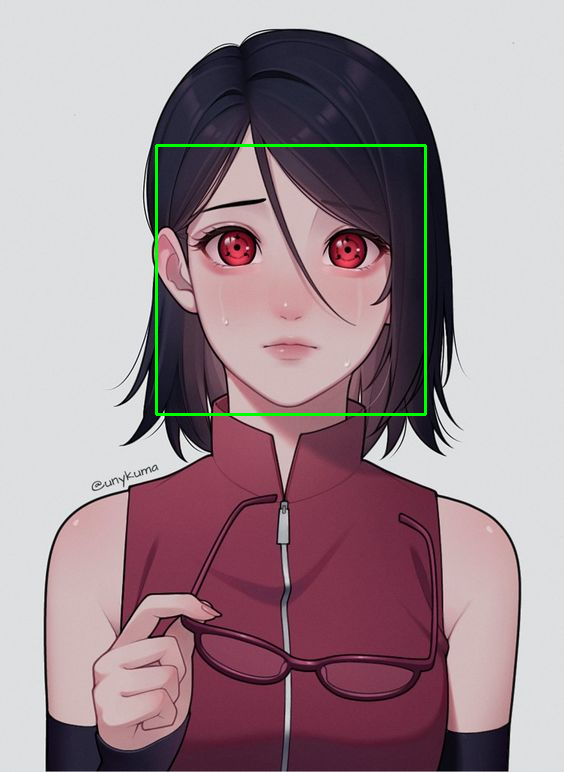

Face detection completed. Result photo saved in Google Drive.


In [ ]:
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow


# @markdown ### **Google Drive Acces**
# @markdown > Berikan Akses Google Drive
Drive_access = "Yes" #@param ["Yes", "OfCourse"]

# Mount Google Drive 
drive.mount('/content/drive')

# Fungsi untuk mendeteksi wajah dalam foto
def detect_faces_in_photo(photo_path):
    # Load cascade classifier (pre-trained model for face detection)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the photo
    photo = cv2.imread(photo_path)

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the result
    cv2_imshow(photo)

    # Save the result
    # @markdown ### **Lokasi Penyimpanan**
    # @markdown > Ini adalah tempat untuk menempatkan hasil outputnya (Sebaiknya tidak usah dirubah)
    result_Photo_path = '/content/drive/FaceDetection/result_photo.jpg'#@param {type:'string'}
    cv2.imwrite(result_Photo_path, photo)
    print("Face detection completed. Result photo saved in Google Drive.")

# Fungsi untuk mendeteksi wajah dalam video
def detect_faces_in_video(video_path):
    # Load cascade classifier (pre-trained model for face detection)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the video
    video = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video.get(cv2.CAP_PROP_FPS)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create a VideoWriter object to save the result video
    result_Video_path = '/content/drive/MyDrive/result_video.avi'#@param {type:'string'}
    result_video = cv2.VideoWriter(result_Video_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

    frame_count = 0

    while True:
        # Read a frame from the video
        ret, frame = video.read()

        if not ret:
            break

        # Convert to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Perform face detection
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with detected faces to the result video
        result_video.write(frame)

        frame_count += 1
        print(f"Processing frame {frame_count}/{total_frames}")

    # Release the video capture and writer objects
    video.release()
    result_video.release()

    print("Face detection completed. Result video saved in Google Drive.")

# Fungsi untuk menampilkan video yang telah diproses
def display_video(video_path):
    video = cv2.VideoCapture(video_path)

    while True:
        ret, frame = video.read()

        if not ret:
            break

        cv2_imshow(frame)

        # Tahan tombol 'q' untuk keluar dari tampilan video
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video.release()

# Main program
def main():
    # @markdown ### **Setting**
    # @markdown > Setting Mode dan Menempatkan jalur Foto/video (Jalur diambil dari drive kalian)
    Mode = "Foto" #@param ["Foto", "Video"]
    if Mode == "Foto" :
      photo_path = "/content/drive/MyDrive/Sarada1#Anime.jpg"#@param {type:'string'}
      detect_faces_in_photo(photo_path)
    else :
      # Meminta jalur video dari pengguna
      video_path = "/content/drive/MyDrive/test.mp4"#@param {type:'string'}
      detect_faces_in_video(video_path)

# Menjalankan program utama
main()
